## Using One-hot encoding method to replicate the result of Hussian 5.1

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

database = pd.read_csv("Data/Perovskite_database_content_all_data.csv", low_memory=False)

In [2]:
# for column in database.columns:
#     print(column)
    #Perovskite_composition_a_ions, 
    #Perovskite_composition_a_ions_coefficients (need to include b and c columns as well)
    #Perovskite_band_gap 

database_split = database['Perovskite_composition_a_ions'].str.split(';', expand=True)
dataratio_split = database['Perovskite_composition_a_ions_coefficients'].str.split(';', expand=True)

In [3]:
#I came up with two method for matching: to top each other and form a 3D array 
# database_split = database_split.astype(str)
# stacked_array = np.stack([database_split, dataratio_split], axis=2)
#The logic is that every column should in theory have only one value after the mask
#so I can collaspe all the other "empty" column to form a (1,43378,2) table
#and then flip it and append it to a new table


# masks = {}

# def make_mask(symbol):
#     mask_df = pd.DataFrame({"0" : database_split[0].str.find(symbol), 
#                        "1" : database_split[1].str.find(symbol), 
#                        "2" : database_split[2].str.find(symbol),
#                        "3" : database_split[3].str.find(symbol),
#                        "4" : database_split[4].str.find(symbol)})
#     masks[f'mask_{symbol}'] = mask_df

# make_mask('Cs') 
# make_mask(' Cs')
# make_mask('MA')
# make_mask(' MA')
# make_mask('FA')
# make_mask(' FA')
# print(masks["mask_Cs"])
# database_split[masks["mask_Cs"].to_numpy() == 0]
# mask_Cs, mask_MA, mask_FA, is to organise "stacked_array"

database_split.where(database_split == "Cs", "None")

# When making a mask
# This is a mask
table = pd.DataFrame()
def a_column_collapse(name):
    b = " " + name
    # mask1 = database_split.where(database_split == name)
    mask = (database_split == name) | (database_split == b)
    # mask2 = database_split.where(database_split == b, False)

    # combined_mask = mask1 or mask2
    # print(mask)
    # combined_mask = combined_mask.where(combined_mask == False, True)
    collapsed_column = dataratio_split[mask].apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
    table[name] = collapsed_column
    return collapsed_column

# mask = database_split.where(database_split == "Cs", False)
# mask = mask.where(mask == False, True)
# collapsed_column = database_split[mask].stack().reset_index(drop=True)
# table["Cs"] = collapsed_column

Cs = "Cs"
FA = "FA"
MA = "MA"
a_column_collapse(Cs)
a_column_collapse(FA)
a_column_collapse(MA)


data_B = database['Perovskite_composition_b_ions'].str.split(';', expand=True)
ratio_B = database['Perovskite_composition_b_ions_coefficients'].str.split(';', expand=True)


def b_column_collapse(name):
    mask = data_B == name
    collapsed_column = ratio_B[mask].apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
    table[name] = collapsed_column
    return collapsed_column

Pb = "Pb"
Sn = "Sn"
b_column_collapse(Pb)
b_column_collapse(Sn)
print(table)

         Cs     FA     MA   Pb   Sn
0         1    NaN    NaN  NaN    1
1         1    NaN    NaN  NaN    1
2         1    NaN    NaN  NaN    1
3         1    NaN    NaN  NaN    1
4         1    NaN    NaN  NaN    1
...     ...    ...    ...  ...  ...
43374  0.05   0.91   0.04    1  NaN
43375  0.05   0.91   0.04    1  NaN
43376  0.05   0.91   0.04    1  NaN
43377  0.18   0.83    NaN    1  NaN
43378  0.18   0.82    NaN    1  NaN

[43379 rows x 5 columns]


In [4]:
#This is to find what is in b site table and what do I need to filter out in the table of b ions 

arr1 = data_B[0].unique().astype(str)
arr2 = data_B[1].unique().astype(str)
arr3 = data_B[2].unique().astype(str)

arrall_B = np.concatenate((arr1, arr2, arr3))
mask_B = np.char.find(arrall_B, '|') == -1
noline_B = np.unique(np.char.lstrip(arrall_B[mask_B]))
noline_B

# need to filter "Pb" "Sn"

array(['Ag', 'Al', 'Au', 'Ba', 'Bi', 'Ca', 'Co', 'Cr', 'Cu', 'Eu', 'Fe',
       'Ge', 'Hg', 'In', 'La', 'Mg', 'Mn', 'Nb', 'Ni', 'None', 'Pb', 'Pt',
       'Sb', 'Sm', 'Sn', 'Sr', 'Tb', 'Te', 'Ti', 'Y', 'Zn', 'nan'],
      dtype='<U22')

In [5]:
data_C = database['Perovskite_composition_c_ions'].str.split(';', expand=True)
ratio_C = database['Perovskite_composition_c_ions_coefficients'].str.split(';', expand=True)

def c_column_collapse(name):
    mask_C = data_C == name
    collapsed_column = ratio_C[mask_C].apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
    table[name] = collapsed_column
    return collapsed_column

Cl = "Cl"
Br = "Br"
I = "I"
c_column_collapse(Br)
c_column_collapse(Cl)
c_column_collapse(I)
#checked the unique value in Cs, MA, FA, only Cs has value in the column
#and that is only one entry out of 47739!

0          3
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
43374    NaN
43375    NaN
43376    NaN
43377    NaN
43378    NaN
Length: 43379, dtype: object

In [6]:
table["Perovskite_band_gap"] = database["Perovskite_band_gap"] 
table["JV_default_FF"] = database["JV_default_FF"]
table["JV_default_Jsc"] = database["JV_default_Jsc"]
table["JV_default_Voc"] = database["JV_default_Voc"]
table["JV_default_PCE"] = database["JV_default_PCE"]
table["Cell_area_measured"] = database["Cell_area_measured"]
table["JV_light_intensity"] = database["JV_light_intensity"]
table["Pin (mW)"] = database["JV_light_intensity"] * database["Cell_area_measured"]

table

,Cs,FA,MA,Pb,Sn,Br,Cl,I,Perovskite_band_gap,JV_default_FF,JV_default_Jsc,JV_default_Voc,JV_default_PCE,Cell_area_measured,JV_light_intensity,Pin (mW)
0,1,NaN,NaN,NaN,1,NaN,NaN,3,1.27,0.570,0.220,0.002,0.00,0.200,100.0,20.0
1,1,NaN,NaN,NaN,1,0.3,NaN,NaN,NaN,0.250,0.490,0.120,0.00,0.200,100.0,20.0
2,1,NaN,NaN,NaN,1,1.5,NaN,NaN,NaN,0.260,3.690,0.135,0.13,0.200,100.0,20.0
3,1,NaN,NaN,NaN,1,2.7,NaN,NaN,NaN,0.410,1.320,0.227,0.12,0.200,100.0,20.0
4,1,NaN,NaN,NaN,1,3,NaN,NaN,1.75,0.340,1.570,0.190,0.10,0.200,100.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43374,0.05,0.91,0.04,1,NaN,0.15,NaN,NaN,NaN,0.799,24.015,1.109,21.28,0.058,100.0,5.8
43375,0.05,0.91,0.04,1,NaN,0.15,NaN,NaN,1.54,0.695,24.141,1.050,17.61,0.058,100.0,5.8
43376,0.05,0.91,0.04,1,NaN,0.15,NaN,NaN,1.54,0.724,22.547,1.037,16.93,0.058,100.0,5.8
43377,0.18,0.83,NaN,1,NaN,1,NaN,NaN,1.73,0.811,40.000,1.150,NaN,0.240,100.0,24.0


In [7]:
table_datacheck = table
df_numeric = table_datacheck.apply(pd.to_numeric, errors='coerce')
table_datacheck = df_numeric.dropna(subset=["Perovskite_band_gap", "JV_default_PCE", "JV_default_FF", "JV_default_Voc", "JV_default_Jsc"])                                       #cut out all NaN and strings
table_datacheck = table_datacheck[table_datacheck["JV_default_PCE"] <= 25]  #cut out all PCE greater than 25
table_datacheck = table_datacheck[table_datacheck["JV_default_FF"] <= 1.1] 
table_datacheck = table_datacheck[table_datacheck["JV_default_Jsc"] <= 35] 
table_datacheck = table_datacheck[table_datacheck["JV_default_FF"] <= 1.63] 
table_datacheck = table_datacheck[(table_datacheck["JV_default_Voc"] >= 0.25) & (table_datacheck["JV_default_PCE"] > 2.5)]
table_datacheck = table_datacheck.drop_duplicates()



#Replace all NaN to 0 first
table_datacheck.fillna(0, inplace=True)
#filter out all that does not add up to 1
mask1 = (table_datacheck['Cs'] + table_datacheck['FA'] + table_datacheck["MA"]) == 1                                   # Filter the DataFrame to keep only rows where the sum is equal to a certian number
mask2 = (table_datacheck['Sn'] + table_datacheck['Pb']) == 1
mask3 = (table_datacheck['Br'] + table_datacheck['Cl'] + table_datacheck['I']) == 3
mask = mask1 & mask2 & mask3

table_datacheck = table_datacheck[mask]
table_datacheck = table_datacheck.astype(str)

mask

9         True
10        True
11        True
12        True
13        True
         ...  
43363    False
43364    False
43365    False
43366    False
43375    False
Length: 28012, dtype: bool

In [8]:
data_C = database['Perovskite_composition_c_ions'].str.split(';', expand=True)
ratio_C = database['Perovskite_composition_c_ions_coefficients'].str.split(';', expand=True)

arr1 = data_C[0].unique().astype(str)
arr2 = data_C[1].unique().astype(str)
arr3 = data_C[2].unique().astype(str)
arr4 = data_C[3].unique().astype(str)

arrall_C = np.concatenate((arr1, arr2, arr3, arr4))
mask_C = np.char.find(arrall_C, '|') == -1
noline_C = np.unique(np.char.lstrip(arrall_C[mask_C]))
arrall_C

#need "Br" "Cl" "Cs" "FA" "I" "MA"

array(['I', 'Br', 'I | I', 'Br | Br', 'Br | I', 'O', 'Cl', 'I | Br',
       '(BF4)', '(SCN)', 'I | I | I', 'I | I | Br', '(PF6)', 'S', '0.03',
       'nan', 'F', 'Cs', 'None', ' I', ' I | Br', ' I | I', ' Cl',
       ' (SCN)', ' SCN', ' PF6', ' 0.97', 'nan', ' Br', ' I | Cl',
       ' (PF6)', ' F', ' FA', ' S', 'None', ' I', ' I | Br', ' SCN',
       'nan', ' MA', 'None', ' I', 'nan'], dtype='<U10')

#### Before entering the next stage, I decided to perform checks on the data and try to narrow it down to 600
Use section 4 data check to try to make it appears like the data they are using
1. PCE against bandgap

Text(0, 0.5, 'PCE')

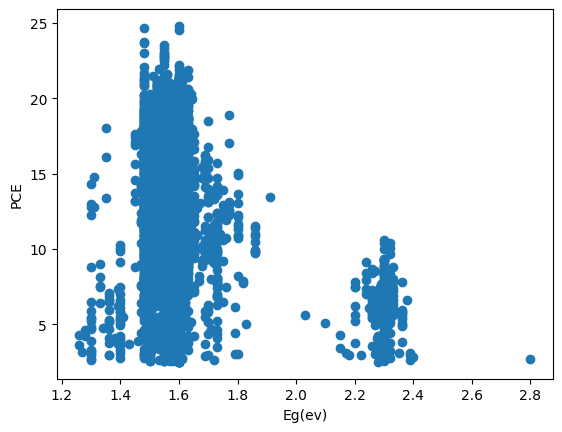

In [9]:
table_datacheck = table.copy()
df_numeric = table_datacheck.apply(pd.to_numeric, errors='coerce')
table_datacheck = df_numeric.dropna(subset=["Perovskite_band_gap", "JV_default_PCE", "JV_default_FF", "JV_default_Voc", "JV_default_Jsc"])                                       #cut out all NaN and strings
table_datacheck = table_datacheck[table_datacheck["JV_default_PCE"] <= 25]  #cut out all PCE greater than 25
table_datacheck = table_datacheck[table_datacheck["JV_default_FF"] <= 1.1] 
table_datacheck = table_datacheck[table_datacheck["JV_default_Jsc"] <= 35] 
table_datacheck = table_datacheck[table_datacheck["JV_default_FF"] <= 1.63] 
table_datacheck = table_datacheck[(table_datacheck["JV_default_Voc"] >= 0.25) & (table_datacheck["JV_default_PCE"] > 2.5)]
table_datacheck = table_datacheck.drop_duplicates()


#Replace all NaN to 0 first
columnName = ["Cs", "MA", "FA", "Sn", "Pb", "Br", "Cl", "I"]

nan_mask = pd.isna(table_datacheck)
nan_mask = nan_mask[columnName]

table_datacheck_MASK = table_datacheck.copy()
table_datacheck_MASK[nan_mask] = 0

# columnName = {'Cs': 0, 'MA': 0, 'FA': 0, 'Sn': 0, 'Pb': 0, 'Br': 0, 'Cl': 0, 'I': 0}
# table_datacheck.fillna(value=columnName, inplace=True)

# df2 = pd.DataFrame(np.zeros((table_datacheck.index[-1] + 1, len(columnName))), columns=columnName)
# table_datacheck.fillna(df2, inplace=True)
# Way bad idea

#filter out all that does not add up to 1
mask1 = (table_datacheck_MASK['Cs'] + table_datacheck_MASK['FA'] + table_datacheck_MASK["MA"]) == 1                                   # Filter the DataFrame to keep only rows where the sum is equal to a certian number
mask2 = (table_datacheck_MASK['Sn'] + table_datacheck_MASK['Pb']) == 1
mask3 = (table_datacheck_MASK['Br'] + table_datacheck_MASK['Cl'] + table_datacheck_MASK['I']) == 3
mask = mask1 & mask2 & mask3

del table_datacheck_MASK

# print(table_datacheck.shape)

table_datacheck = table_datacheck[mask]

x = table_datacheck["Perovskite_band_gap"]
y = table_datacheck["JV_default_PCE"]

plt.scatter(x,y)
plt.xlabel("Eg(ev)")
plt.ylabel("PCE")

# print(table_datacheck.shape)

3. PCE against FF

Text(0, 0.5, 'PCE')

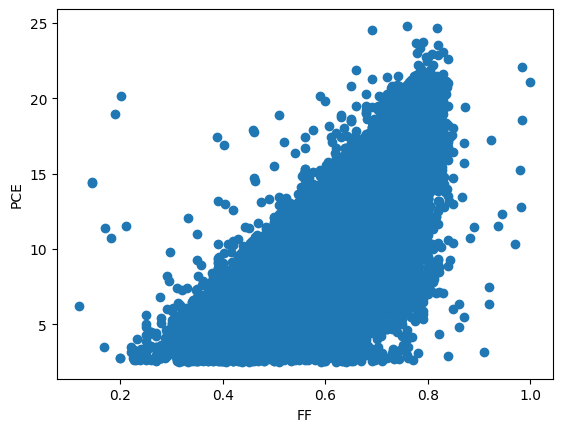

In [10]:
x = table_datacheck["JV_default_FF"]
y = table_datacheck["JV_default_PCE"]

plt.scatter(x,y)
plt.xlabel("FF")
plt.ylabel("PCE")

4. PCE against Jsc

24344

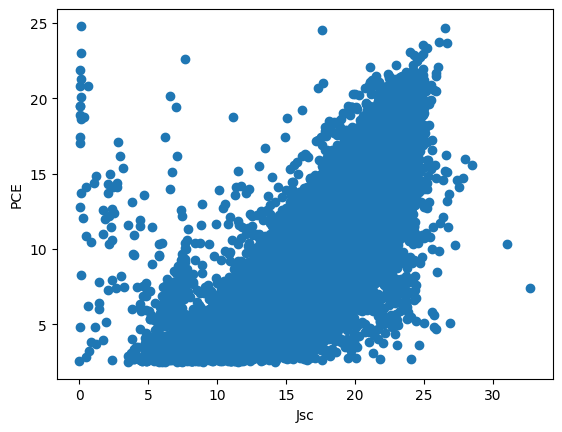

In [11]:
x = table_datacheck["JV_default_Jsc"]
y = table_datacheck["JV_default_PCE"]

plt.scatter(x,y)
plt.xlabel("Jsc")
plt.ylabel("PCE")

len(x)

5. PCE against Voc

Cs                     35424
FA                     32513
MA                      5363
Pb                      1722
Sn                     42724
Br                     32628
Cl                     43321
I                      11139
Perovskite_band_gap    10686
JV_default_FF           2348
JV_default_Jsc          2155
JV_default_Voc          2191
JV_default_PCE          1000
Cell_area_measured      1079
JV_light_intensity       126
Pin (mW)                1152
dtype: int64


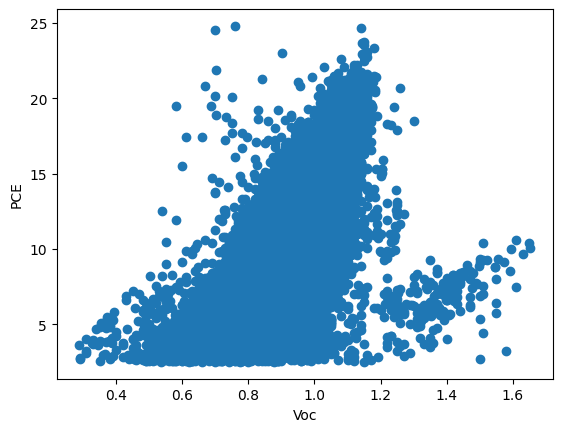

In [12]:
x = table_datacheck["JV_default_Voc"]
y = table_datacheck["JV_default_PCE"]

plt.scatter(x,y)
plt.xlabel("Voc")
plt.ylabel("PCE")


nan_count_per_column = table.isna().sum()
print(nan_count_per_column)

C:\Users\Mushr\AppData\Local\Temp\ipykernel_9588\496842745.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
C:\Users\Mushr\AppData\Local\Temp\ipykernel_9588\496842745.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskY = y.str.contains(float_regex, regex=True, na=False)
C:\Users\Mushr\AppData\Local\Temp\ipykernel_9588\496842745.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
C:\Users\Mushr\AppData\Local\Temp\ipykernel_9588\496842745.py:9: UserWarning: This pattern is interpreted as a reg

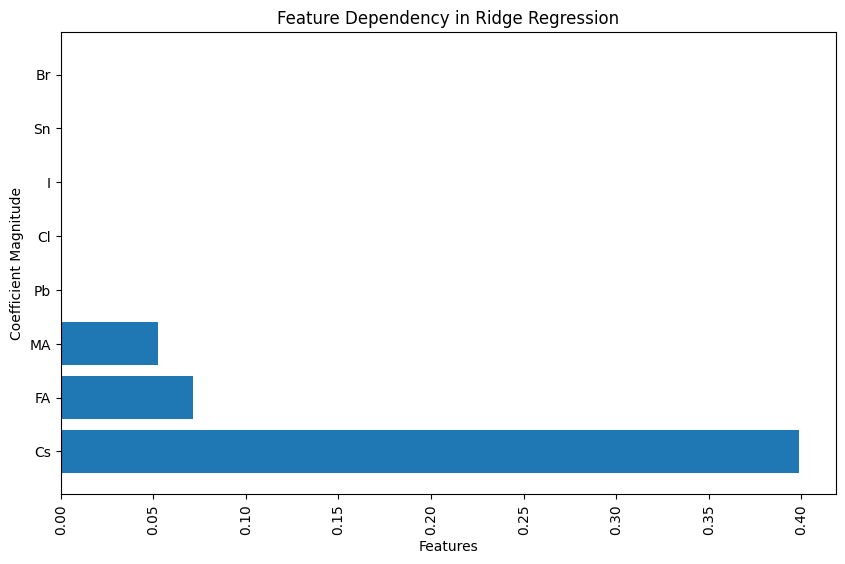

In [13]:
ions = ["Br","Sn","I","Cl","Pb","MA","FA","Cs"]
ions.reverse()
number = []

def plot_bar_RR(name):                                          # Using Ridge Regression and training the model to plot Fig.4 (a)
    x, y = table_datacheck[name].astype(str), table_datacheck["Perovskite_band_gap"].astype(str)    
    float_regex = r"^[+-]?(\d+(\.\d*)?|\.\d+)$"                 # "only-readable-by-computer-filter" (actually called Regular Expression Filter for float/integer that looks like strings only)
    MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
    MaskY = y.str.contains(float_regex, regex=True, na=False)
    SuperMask = MaskX & MaskY                                   # combining boolean masks
    x = pd.to_numeric(x[SuperMask]).to_frame()                  # "to_frame" -> pd.Series to pd.DataFrame because "ridge.fit" need this format
    y = pd.to_numeric(y[SuperMask]).to_frame()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    ridge = Ridge(alpha=1.0)
    ridge.fit(x_train, y_train)
    coefficients = np.abs(ridge.coef_).flatten()
    return coefficients


for item in ions:
    number.append(plot_bar_RR(item)[0])



plt.figure(figsize=(10, 6))
# plt.bar(feature, coefficients)
plt.barh(ions, number)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Dependency in Ridge Regression')
plt.xticks(rotation=90)
plt.show()


C:\Users\Mushr\AppData\Local\Temp\ipykernel_9588\3682010792.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
C:\Users\Mushr\AppData\Local\Temp\ipykernel_9588\3682010792.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  MaskY = y.str.contains(float_regex, regex=True, na=False)
c:\Users\Mushr\miniconda3\envs\researchProject\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Mushr\AppData\Local\Temp\ipykernel_9588\3682010792.py:8: UserWarning: This pattern is interpreted as a regular expression, and 

8
8


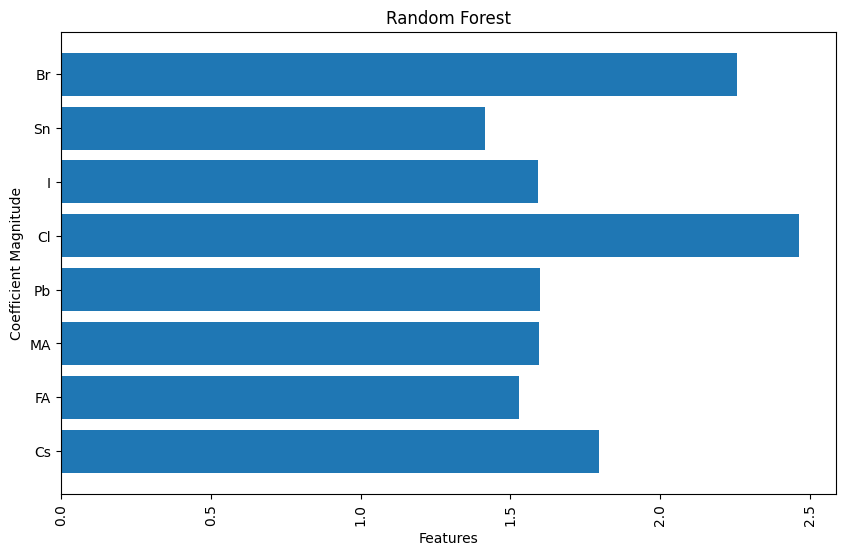

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


def plot_bar_RF(name):                                          # Using Ridge Regression and training the model to plot Fig.4 (a)
    x, y = table_datacheck[name].astype(str), table_datacheck["Perovskite_band_gap"].astype(str)
    float_regex = r"^[+-]?(\d+(\.\d*)?|\.\d+)$"                 # "only-readable-by-computer-filter" (actually called Regular Expression Filter for float/integer that looks like strings only)
    MaskX = x.str.contains(float_regex, regex=True, na=False)   # mask will store the information of the filtered row
    MaskY = y.str.contains(float_regex, regex=True, na=False)
    SuperMask = MaskX & MaskY                                   # combining boolean masks
    x = pd.to_numeric(x[SuperMask]).to_frame()                  # "to_frame" -> pd.Series to pd.DataFrame because "ridge.fit" need this format
    y = pd.to_numeric(y[SuperMask]).to_frame()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    randomForestRegressor = RandomForestRegressor(n_estimators=100, random_state=42)
    randomForestRegressor.fit(x_train, y_train)
    y_pred = randomForestRegressor.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # print("MSE: ", mse)
    # print("R2 ", r2)
    # print("Average: ", np.average(y_pred))

    return np.average(y_pred)

number = []

for item in ions:
    number.append(plot_bar_RF(item))

print(len(ions))
print(len(number))

plt.figure(figsize=(10, 6))
# plt.bar(feature, coefficients)
plt.barh(ions, number)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Random Forest')
plt.xticks(rotation=90)
plt.show()


### 5.2 Device parameters prediction 
(To run a few more regression models and predict PCE by multiplying several factors together. )
$\newline$
To be able to achieve this, Jsc, Voc, and FF would need to be added into the dataframe "table" first.
$\newline$
The first step is to train the model to associate different features to Jsc, Voc, and FF.  
$\newline$
Need to know power input as well
$\newline$
Model needed: KNN, xgboost, RF, RR, LR

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

table_datacheck.fillna(0, inplace=True)
X, Y = table_datacheck.iloc[ : , :8], table_datacheck["JV_default_Jsc"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
Jsc_pred = knn.predict(X_test)


knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_Voc"])
Voc_pred = knn.predict(X_test)


knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_FF"])
FF_pred = knn.predict(X_test)

Cell_area = table_datacheck.loc[y_test.index, "Cell_area_measured"]
light_intensity = table_datacheck.loc[y_test.index, "JV_light_intensity"]
actual_PCE = table_datacheck.loc[y_test.index, "JV_default_PCE"]


Predicted_PCE = (FF_pred * Voc_pred * Jsc_pred) / (Cell_area * light_intensity)

Jsc_r2 = r2_score(actual_PCE, Predicted_PCE)

35294    1.369561
12915    3.081513
19638    1.232605
27172    1.232605
5261     1.232605
           ...   
32357    1.232605
30897    2.054342
29003    1.232605
13115    1.232605
20202    1.232605
Length: 4869, dtype: float64
35294    18.30
12915    17.60
19638    16.74
27172    12.70
5261     17.60
         ...  
32357    10.01
30897     8.99
29003     7.69
13115     9.17
20202     8.35
Name: JV_default_PCE, Length: 4869, dtype: float64
[35294    True
12915    True
19638    True
27172    True
5261     True
         ... 
32357    True
30897    True
29003    True
13115    True
20202    True
Length: 4869, dtype: bool]


TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [72]:
#XGBoost

xgb = XGBRegressor()


params = {
    'objective': 'reg:squarederror',  # For regression tasks
    'max_depth': 3,                   # Maximum depth of trees
    'learning_rate': 0.1,             # Step size shrinkage
    'n_estimators': 100,              # Number of boosting rounds
    'eval_metric': 'rmse'             # Evaluation metric
}

# Train the model
xgb.fit(X_train, y_train)
Jsc_xgb_pred = xgb.predict(X_test)

xgb.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_Voc"])
Voc_xgb_pred = xgb.predict(X_test)


xgb.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_FF"])
FF_xgb_pred = xgb.predict(X_test)

Predicted_xgb_PCE = (FF_xgb_pred * Voc_xgb_pred * Jsc_xgb_pred) / (Cell_area * light_intensity)


In [73]:
# Random Forest

# Train the model
randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(X_train, y_train)
Jsc_RF_pred = randomForestRegressor.predict(X_test)

randomForestRegressor.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_Voc"])
Voc_RF_pred = randomForestRegressor.predict(X_test)


randomForestRegressor.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_FF"])
FF_RF_pred = randomForestRegressor.predict(X_test)

Predicted_RF_PCE = (FF_RF_pred * Voc_RF_pred * Jsc_RF_pred) / (Cell_area * light_intensity)

In [74]:
# Ridge Regression

# Train the model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
Jsc_RR_pred = ridge.predict(X_test)

ridge.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_Voc"])
Voc_RR_pred = ridge.predict(X_test)

ridge.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_FF"])
FF_RR_pred = ridge.predict(X_test)

Predicted_RR_PCE = (FF_RR_pred * Voc_RR_pred * Jsc_RR_pred) / (Cell_area * light_intensity)


In [98]:
# Linear regression
from sklearn.linear_model import LinearRegression


# Train the model
LinearRegression = LinearRegression().fit(X_train, y_train)
Jsc_LR_pred = LinearRegression.predict(X_test)

LinearRegression.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_Voc"])
Voc_LR_pred = LinearRegression.predict(X_test)

LinearRegression.fit(X_train, table_datacheck.loc[y_train.index, "JV_default_FF"])
FF_LR_pred = LinearRegression.predict(X_test)

Predicted_LR_PCE = (FF_LR_pred * Voc_LR_pred * Jsc_LR_pred) / (Cell_area * light_intensity)


PCEresults = pd.DataFrame()
PCEresults["Predicted_PCE"] = Predicted_PCE
PCEresults["Predicted_xgb_PCE"] = Predicted_xgb_PCE
PCEresults["Predicted_RF_PCE"] = Predicted_RF_PCE
PCEresults["Predicted_RR_PCE"] = Predicted_RR_PCE
PCEresults["Predicted_LR_PCE"] = Predicted_LR_PCE
PCEresults["actual_PCE"] = actual_PCE

PCEresults = PCEresults[~np.isinf(PCEresults).any(axis=1)]
PCEresults

,Predicted_PCE,Predicted_xgb_PCE,Predicted_RF_PCE,Predicted_RR_PCE,Predicted_LR_PCE,actual_PCE
35294,1.369561,1.300034,1.299676,1.301083,1.300813,18.30
12915,3.081513,2.925077,2.924271,2.927436,2.926828,17.60
19638,1.232605,1.170031,1.169708,1.170974,1.170731,16.74
27172,1.232605,1.170031,1.169708,1.170974,1.170731,12.70
5261,1.232605,1.170031,1.169708,1.170974,1.170731,17.60
...,...,...,...,...,...,...
32357,1.232605,1.170031,1.169708,1.170974,1.170731,10.01
30897,2.054342,1.950051,1.949514,1.951624,1.951219,8.99
29003,1.232605,1.170031,1.169708,1.170974,1.170731,7.69
13115,1.232605,1.170031,1.169708,1.170974,1.170731,9.17


JV_light_intensity is measured as [mW2/cm2] according to the Material Zone website.
$\newline$
Cell_area_measured has a unit of 0.04 cm^2

In [ ]:
#Cell_area_measured 
#JV_light_intensity [mW2/cm2]